In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import pathlib
import sys
# add '..' to the begining of path
sys.path.insert(0, str('..'))


print(sys.path)
from utils.utils import show_mask_image


['..', '/home/alalbiol/Programacion/Mammography/mamo_holistic/notebooks', '', '/opt/ros/humble/lib/python3.10/site-packages', '/opt/ros/humble/local/lib/python3.10/dist-packages', '/home/alalbiol/anaconda3/envs/Mammo/lib/python311.zip', '/home/alalbiol/anaconda3/envs/Mammo/lib/python3.11', '/home/alalbiol/anaconda3/envs/Mammo/lib/python3.11/lib-dynload', '/home/alalbiol/anaconda3/envs/Mammo/lib/python3.11/site-packages']


In [3]:
ddsm_annotations = pd.read_json('../resources/ddsm/ddsm_annotations_16bits.json.gz', compression='gzip', orient='records', lines=True)

In [4]:
print(ddsm_annotations.columns)

Index(['type', 'assessment', 'subtlety', 'pathology', 'outline',
       'bounding_box', 'breast_malignant', 'image_id', 'mask_id'],
      dtype='object')


In [5]:
#[xmin, ymin, xmax, ymax, centerx, centery, width, height] bounding box

bb_areas = []
from tqdm import tqdm

for index, row in tqdm(ddsm_annotations.iterrows()):
    
    if row['image_id'] != "benigns/benign_04/case3157/B_3157_1.RIGHT_CC.png":
        continue
    print(row['mask_id'])
    
    points = np.array(row['outline']).T
    
    xmin, ymin = points.min(axis=0)
    xmax, ymax = points.max(axis=0)
    xmin = max(xmin, 0)
    ymin = max(ymin, 0)
    #xmax = min(xmax, 896-1)
    #ymax = min(ymax, 1152-1)
    
    width = xmax - xmin
    height = ymax - ymin
    bounding_box = (xmin, ymin, width, height)
    
    print(f"{width=}, {height=}, {bounding_box=}")
    
        
    break
    #print(f"{width=}, {height=}, {bounding_box=}")
    
    
    
    



2816it [00:00, 33723.82it/s]

benigns/benign_04/case3157/B_3157_1.RIGHT_CC_MASS_BENIGN_mask_0.png
width=46.08000000000004, height=41.14285714280004, bounding_box=(832.0, 738.612244898, 46.08000000000004, 41.14285714280004)


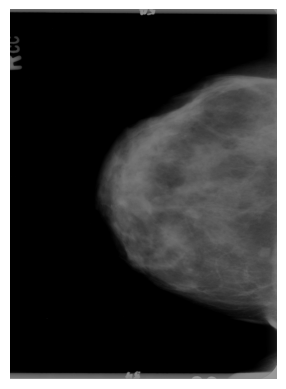

In [6]:


root_path = pathlib.Path('/home/alalbiol/Data/mamo/DDSM_png_16bit_1152x896')

image_file = root_path / 'benigns/benign_04/case3157/B_3157_1.RIGHT_CC.png'
mask_file = root_path / 'benigns/benign_04/case3157/B_3157_1.RIGHT_CC_MASS_BENIGN_mask_0.png'

show_mask_image(image_file, mask_file)

In [7]:
mask = np.array(Image.open(mask_file))
print(mask.sum())

0


In [13]:
from utils.annotation_utils import read_overlay, get_outline_curve

ov = read_overlay('/media/HD/mamo/DDSM_png_noclipping/cases/benigns/benign_04/case3157/B_3157_1.RIGHT_CC.OVERLAY')
print(ov)

ov[2][0][4]

outline = get_outline_curve(ov[2][0][4][0])

print("min outline", np.array(outline).min(axis=1))
print("max outline", np.array(outline).max(axis=1))

xmin, ymin = np.array(outline).min(axis=1)
xmax, ymax = np.array(outline).max(axis=1)

width = xmax - xmin
height = ymax - ymin

print(f"{width=}, {height=}")


(1, [1], [('MASS', 4, 4, 'BENIGN', [[2712, 3024, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 

Number of images:  10420
original_size:  (4704, 2800)
target_size:  (1152, 896)
scale_x:  0.32
scale_y:  0.24489795918367346
boundary min x:  2600
boundary max x:  2744
boundary min y:  3016
boundary max y:  3184
new_boundary min x:  832.0
new_boundary max x:  878.08
new_boundary min y:  738.6122448979592
new_boundary max y:  779.7551020408163
despues de resize (896, 1152)
image shape:  (1152, 896)
outline:  (473, 2)
sum mask hola:  407745
min outline [832.        738.6122449]
max outline [878.08       779.75510204]
xmin=832.0, ymin=738.6122448979592, xmax=878.08, ymax=779.7551020408163
width=46.08000000000004, height=41.14285714285711
image width and height (2800, 4704)
outline shape (473, 2)
mask sum en notebook 407745


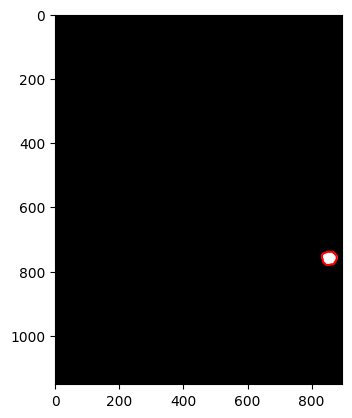

In [49]:

import cv2

root_original_ddsm = '/media/HD/mamo/DDSM_png_noclipping'

from utils.ddsm_resize_utils import create_ddsm_df, rescale_ddsm_image

ddsm_annotations = create_ddsm_df(ddsm_root_folder=root_original_ddsm)

ddsm_root_path = pathlib.Path('/media/HD/mamo/DDSM_png_noclipping/cases')

image_file = ddsm_root_path / 'benigns/benign_04/case3157/B_3157_1.RIGHT_CC.png'
overlay_path = ddsm_root_path / 'benigns/benign_04/case3157/B_3157_1.RIGHT_CC.OVERLAY'



anot = {'original_path': image_file, 'overlay_path': overlay_path}

scaled_anot = rescale_ddsm_image(anot, ddsm_root_folder=root_original_ddsm, 
                   dest_root_folder=pathlib.Path('/tmp'),
                   target_size=(1152, 896))

#print(scaled_anot[0]['outline'])

outline = scaled_anot[0]['outline']

print("min outline", np.array(outline).min(axis=1))
print("max outline", np.array(outline).max(axis=1))

xmin, ymin = np.array(outline).min(axis=1)
xmax, ymax = np.array(outline).max(axis=1)
width = xmax - xmin
height = ymax - ymin

print(f"{xmin=}, {ymin=}, {xmax=}, {ymax=}")

print(f"{width=}, {height=}")



image = Image.open(image_file)
print("image width and height", image.size)

mask = np.zeros((1152,896) , dtype=np.uint8)

outline = np.array(outline).astype(np.int32).T

print("outline shape", outline.shape)
# Convert outline to NumPy arrays for x and y coordinates
#outline_x = np.array(outline[0])
#outline_y = np.array(outline[1])

# Combine x and y into a single array of shape (n, 2)
#coords = np.column_stack((outline_x, outline_y)).astype(np.int32)

# Draw the contour onto the mask
cv2.drawContours(mask, [outline], -1, 255, thickness=cv2.FILLED)

print("mask sum en notebook", mask.sum())

# Fill the mask with the polygon defined by the outline
plt.imshow(mask, cmap='gray')
plt.plot(outline_x, outline_y, 'r')









In [ ]:
mask2 = np.array(
    Image.open(
        '/tmp/benigns/benign_04/case3157/B_3157_1.RIGHT_CC_MASS_BENIGN_mask_0.png'))

print(mask2.sum())





FileNotFoundError: [Errno 2] No such file or directory: '/tmp/cases/benigns/benign_04/case3157/B_3157_1.RIGHT_CC_MASS_BENIGN_mask_0.png'